# Datenherkunft
## Dataset 1: owid-co2-data.csv
Dieses Dataset stammt von der Webseite "Our World in Data" und basiert auf Daten des Global Carbon Project. Bei dem Original-Dataset handelt sich um das "Global Carbon Budget", welches Daten über den CO2 ausstoß diverser Länder und Kontinente enthält, aufgeteilt nach namen. Für diese Analyse habe ich mich auf Kontinentaleuropa (ohne Rusland und die Türkei) beschränkt. Die restlichen Daten habe ich manuel entfernt. Hierbei habe ich nicht die bereits im Dataset vorhandenen Zeilen für Europ genutzt, da mir nicht bekannt ist ob diese die Türkei und Russland enthalten. Außerdem enthalten diese bestimmte Spalten wie beispielsweise BiP nicht. Zudem wurden folgende Länder wegen stark unvollständigen Daten exkludiert: Färöer-Inseln, Gönland, Isle of Man, Bailiwick of Jersey, Monaco, San Marino, Gibralta und der Vatikanstadt. 
<details>
<summary>Zitierung ansehen</summary>
Hannah Ritchie (2022) - “CO₂ emissions dataset: our sources and methods” herausgegeben online auf OurWorldInData.org. Von: 'https://ourworldindata.org/co2-dataset-sources' [Online]

Andrew, R. M., & Peters, G. P. (2023). The Global Carbon Project's fossil CO2 emissions dataset (2023v36) [Datensatz]. Zenodo. https://doi.org/10.5281/zenodo.10177738

Die Datein aus dem Global Carbon Budget können hier abgerufen werden: https://globalcarbonbudget.org/carbonbudget/

Die grundlegende Studie "Global Carbon Budget 2023":
Friedlingstein, P., O'Sullivan, M., Jones, M. W., Andrew, R. M., Bakker, D. C. E., Hauck, J., Landschützer, P., Le Quéré, C., Luijkx, I. T., Peters, G. P., Peters, W., Pongratz, J., Schwingshackl, C., Sitch, S., Canadell, J. G., Ciais, P., Jackson, R. B., Alin, S. R., Anthoni, P., Barbero, L., Bates, N. R., Becker, M., Bellouin, N., Decharme, B., Bopp, L., Brasika, I. B. M., Cadule, P., Chamberlain, M. A., Chandra, N., Chau, T.-T.-T., Chevallier, F., Chini, L. P., Cronin, M., Dou, X., Enyo, K., Evans, W., Falk, S., Feely, R. A., Feng, L., Ford, D. J., Gasser, T., Ghattas, J., Gkritzalis, T., Grassi, G., Gregor, L., Gruber, N., Gürses, Ö., Harris, I., Hefner, M., Heinke, J., Houghton, R. A., Hurtt, G. C., Iida, Y., Ilyina, T., Jacobson, A. R., Jain, A., Jarníková, T., Jersild, A., Jiang, F., Jin, Z., Joos, F., Kato, E., Keeling, R. F., Kennedy, D., Klein Goldewijk, K., Knauer, J., Korsbakken, J. I., Körtzinger, A., Lan, X., Lefèvre, N., Li, H., Liu, J., Liu, Z., Ma, L., Marland, G., Mayot, N., McGuire, P. C., McKinley, G. A., Meyer, G., Morgan, E. J., Munro, D. R., Nakaoka, S.-I., Niwa, Y., O'Brien, K. M., Olsen, A., Omar, A. M., Ono, T., Paulsen, M., Pierrot, D., Pocock, K., Poulter, B., Powis, C. M., Rehder, G., Resplandy, L., Robertson, E., Rödenbeck, C., Rosan, T. M., Schwinger, J., Séférian, R., Smallman, T. L., Smith, S. M., Sospedra-Alfonso, R., Sun, Q., Sutton, A. J., Sweeney, C., Takao, S., Tans, P. P., Tian, H., Tilbrook, B., Tsujino, H., Tubiello, F., van der Werf, G. R., van Ooijen, E., Wanninkhof, R., Watanabe, M., Wimart-Rousseau, C., Yang, D., Yang, X., Yuan, W., Yue, X., Zaehle, S., Zeng, J., and Zheng, B.: Global Carbon Budget 2023, Earth Syst. Sci. Data, 15, 5301-5369, https://doi.org/10.5194/essd-15-5301-2023, 2023.
</details>

### Spalten
- Alle Spalteninfos lassen sich in der Datei owid-co2-codebook.csv ansehen
<br><br>
Die wichtigsten Spalten, welche ich benutzt habe waren:

## Dataset 2: aravg.mon.land.30N.60N.v6.0.0.202407.asc
Dieses Dataset stammt von der Webseite des National Centers for Envriotmental Information, einer Unterorganisation der US-Amerikanischen National Oceanic and Atmospheric Administration, zu deutsch Bundesbehörde für Ozeane und die Atmosphere. Es beinhaltet Temperaturnaomaliedaten vom 30. Breitengrad Nord bis zum 60. Breitengrad Nord. Dieser Bereich geht cirka von Cairo bis Stockholm und beinhaltet damit große Teile von Europa, Nordamerika, Nordasien, Nordafrike und dem Mitleren Osten. Die Temperaturbasis wird dabei aus der Durschnittstemperatur von 1971 bis 2000 berechnet. Die Daten wurden bis 2022 limitiert, da dort das andere Dataset endet.
### Spalten
Folgende Spalten sind in dem Dataset vorhanden:
1. Jahr
2. Monat
3. Temperaturanomalie (K)

Die restlichen Spalten habe ich entfernt, da alle Felder in ihnen bei -999.000000 lagen.








# Installationsanweisungen
Schritte 1-4 können auf eigene gefahr übersprungen werden.

Bitte nutzen sie Python 3.12.4!

Ich bezitze keinen Mac, daher kann ich nicht garantieren dass die Instruktionen funktionieren - ich bin zuversichtlich dass sie das schaffen ;)

1. Führen sie python -m pip install virtualenv im Terminal aus
2. Navigieren sie im Terminal zu dem Ordner in welchen sie die Repo abgelegt haben
3. Führen sie python -m venv . aus um eine Venv-Umgebung in diesem Ordner zu erstellen
4. Führen sie das Script [projektordner]/Scripts/activate aus - Nun sollte ihr Venv aktiviert sein
5. Führen sie pip install -r requirements.txt aus


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd

# Data Cleaning
Zum beginn habe ich das erste Dataset eingelesen und eine Liste von ISO-Ländercodes von Kontinentaleuropa erstellt. Einige Länder habe ich aufgrund von sehr unvollständigen Daten entfernt. Dazu habe ich die Türkei und Russland nicht einbezogen, da diese Größtenteils in Asien liegen. Dann habe ich alle Daten die nicht zu Kontinentaleuropa gehören entfernt:

In [3]:
# Daten einlesen
co_data = pd.read_csv("data\owid-co2-data.csv")
temp_data = pd.read_csv("data/aravg.mon.land.30N.60N.v6.0.0.202407.asc", sep="\s+", header=None)


# Liste von Europäischen 3-Zeichen ISO-Ländercodes, abgesehen von Russland, Türkei,Färöer-Inseln, Gönland, Isle of Man, Bailiwick of Jersey, Monaco, San Marino, Gibralta und der Vatikanstadt
eu_countries = ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'LVA', 'LIE', 'LTU', 'LUX', 'MKD', 'MLT', 'MDA', 'MNE', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE' , 'UKR', 'GBR']

# co_data nach Ländercode filtern
co_data = co_data[co_data['iso_code'].isin(eu_countries)]


<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rikam\AppData\Local\Temp\ipykernel_112272\2884442484.py:2: SyntaxWarning: invalid escape sequence '\o'
  co_data = pd.read_csv("data\owid-co2-data.csv")
C:\Users\rikam\AppData\Local\Temp\ipykernel_112272\2884442484.py:3: SyntaxWarning: invalid escape sequence '\s'
  temp_data = pd.read_csv("data/aravg.mon.land.30N.60N.v6.0.0.202407.asc", sep="\s+", header=None)


Zusätzlich habe ich Daten nach 2021 ausgeschlossen, da das Co2-Dataset nur bis 2021 geht:

In [4]:
# Daten von vor 1850 entfernen
co_data = co_data[co_data['year'] >= 1850]
co_data = co_data[co_data['year'] <= 2021]

temp_data = temp_data[temp_data[0] >= 1850]
temp_data = temp_data[temp_data[0] <= 2021]

Daraufhin habe ich die fehlende Werte entweder durch den Spalten Durschnitt im Bezug auf die entsprechenden Länder oder durch den nächten verfügbaren Wert ersetzt

In [5]:
# NaNs in 'co2' durch den Durchschnitt der Spalte in dem Land ersetzen
co_data['co2'] = co_data.groupby('iso_code')['co2'].transform(lambda x: x.fillna(x.mean()))

# NaNs in Population und GDP durch den wert des folgejahres ersetzen
co_data['population'] = co_data.groupby('iso_code')['population'].transform(lambda x: x.fillna(method='bfill'))
co_data['gdp'] = co_data.groupby('iso_code')['gdp'].transform(lambda x: x.fillna(method='bfill'))

C:\Users\rikam\AppData\Local\Temp\ipykernel_112272\3325603288.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co_data['population'] = co_data.groupby('iso_code')['population'].transform(lambda x: x.fillna(method='bfill'))
C:\Users\rikam\AppData\Local\Temp\ipykernel_112272\3325603288.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co_data['gdp'] = co_data.groupby('iso_code')['gdp'].transform(lambda x: x.fillna(method='bfill'))


# Explorative Datenanalyse
Zu beginn der EDA habe ich mir die Korrelation zwischen CO2 und BiP, sowie die Korrelation zwischen CO2 und Einwohnerzahl angeschaut, welche respektive bei 0.78 und 0.86 liegen:

In [113]:
style.use('fivethirtyeight')

# korrelation von Co2, BiP, Bevölkerung und Temperatur
co_data[["co2", "gdp", "population"]].corr()


,co2,gdp,population
co2,1.000000,0.783122,0.863499
gdp,0.783122,1.000000,0.760000
population,0.863499,0.760000,1.000000


Als Nächstes habe ich mir die Temperaturanomalie über die Jahre angeschaut:

Text(0, 0.5, 'Temperaturabweichung')

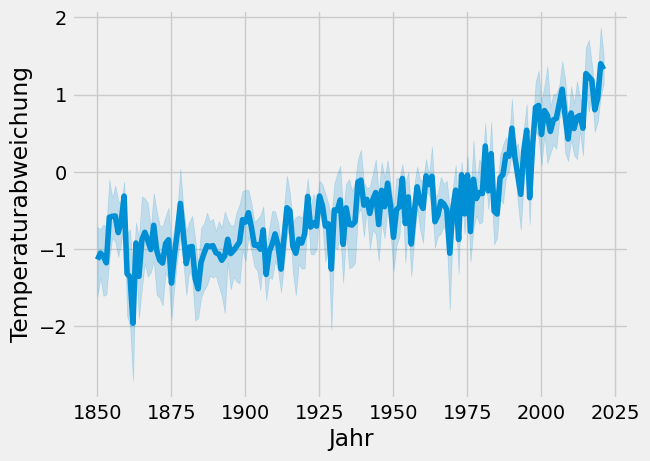

In [7]:
# Lineplot von tempreture Data:
sns.lineplot(data=temp_data,  x=0, y=2)
plt.xlabel('Jahr')
plt.ylabel('Temperaturabweichung')

# Feature Engeneering 1
Um eine Korrelation zwischen CO2 und Temperatur herauszufinden, habe ich einen Gesamt-CO2 Wert in millionen Tonnen hinzugefügt:

In [8]:
# Neue Spalte für Gesamt-CO2-Emissionen pro Land
co_data['total_co2'] = co_data.groupby('iso_code')['co2'].transform(lambda x: x.cumsum())

# EDA 2
Nachdem ich die Spalte für den Gesamten CO2-Ausstoß erstellt habe, möchte ich herrausfinden ob es eine Korrelation mit der Temperaturanomalie gibt:

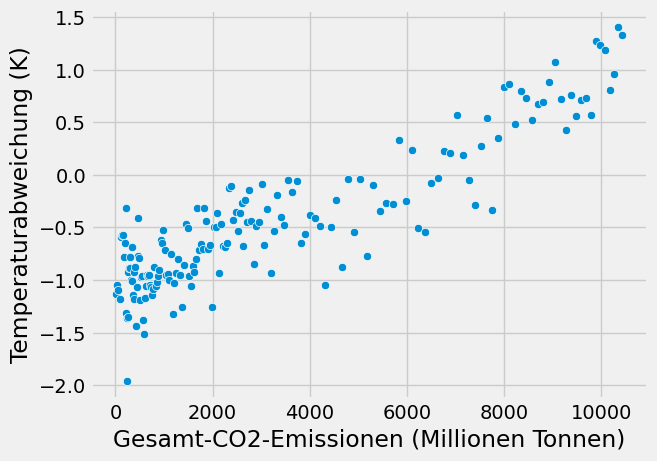

In [9]:
# Temperaturdaten und CO2-Daten zusammenführen
merged_data = pd.merge(co_data[['year', 'total_co2']], temp_data[[0, 2]], left_on='year', right_on=0)
merged_data = merged_data.groupby('year').mean().reset_index()

# Korrelation zwischen Gesamt-CO2-Emissionen und Temperaturabweichung
sns.scatterplot(data=merged_data, x='total_co2', y=2)
plt.xlabel('Gesamt-CO2-Emissionen (Millionen Tonnen)')
plt.ylabel('Temperaturabweichung (K)')
plt.show()


# Abschlussfindings
## Key-Findings, die ich aufzeigen möchte:

- Dass CO2-Emissionen mit der Durchschnittstemperatur zusammenhängen
- Dass reichere Länder und Länder mit mehr Population mehr CO2 ausstoßen

### Key-Finding 1
In diesem Finding möchte ich aufzeigen, dass CO2-Ausstoß und Temperaturanomalie zusammenhängen - Eine statistische Untermauerung des Treibhauseffekts.

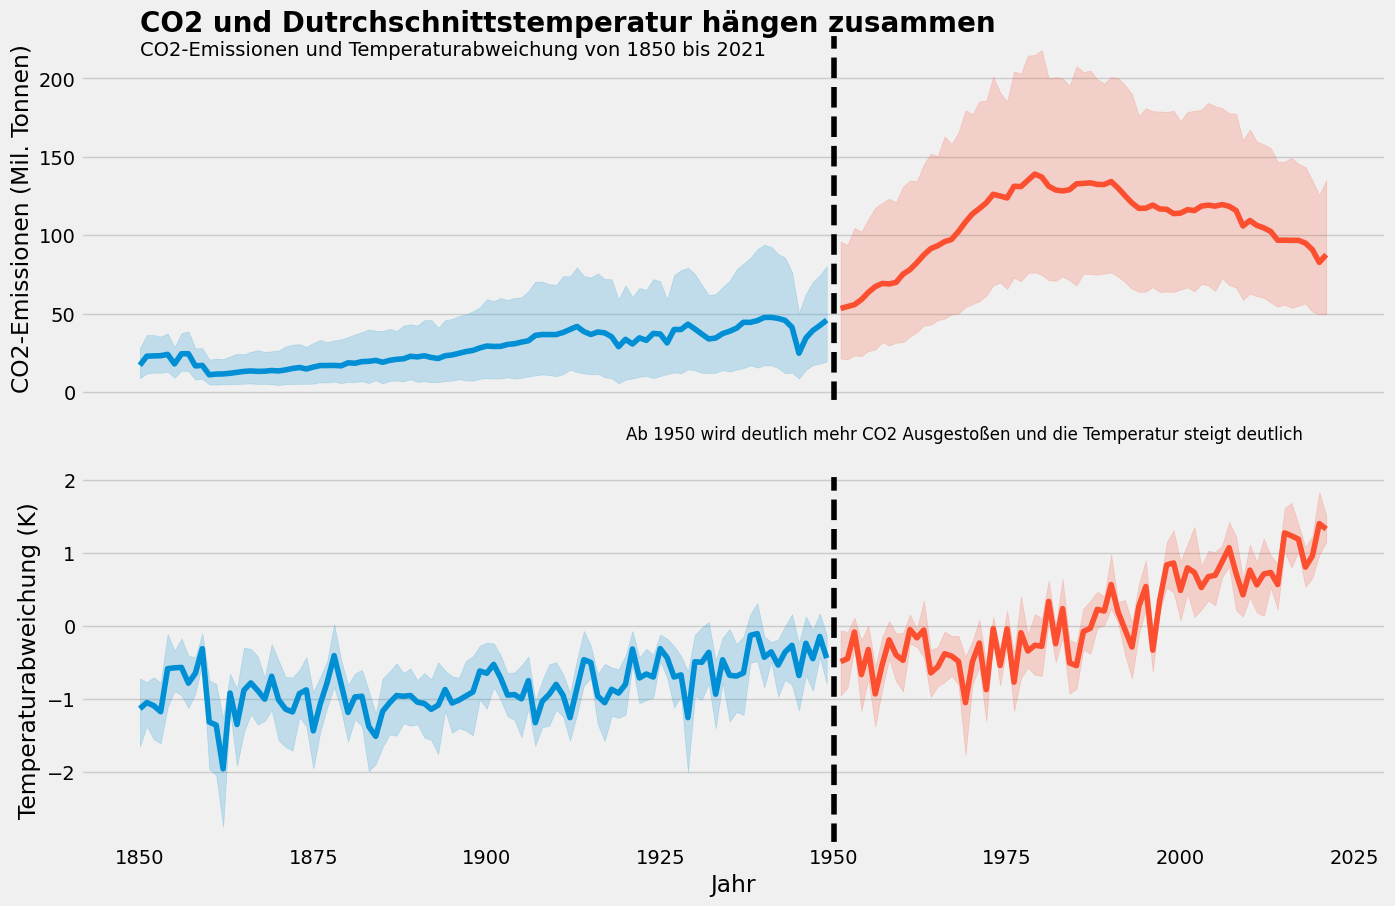

In [92]:
# 2 x 2 Canvas für die vier Plots
fig, axs = plt.subplots(2, 1)
# Figsize größer machen
fig.set_size_inches(15, 10)

# Plot 1.1: CO2 Über Zeit bis 1950
sns.lineplot(data=co_data[co_data["year"] < 1950], x='year', y='co2', ax=axs[0])

# X Ticks und X Label für oberen Plot entfernen
axs[0].set_xticks([])
axs[0].set_xlabel('')
axs[0].set_ylabel('CO2-Emissionen (Mil. Tonnen)')


# Plot 1.2: Co2 über Zeit ab 1950
sns.lineplot(data=co_data[co_data["year"] > 1950], x='year', y='co2', ax=axs[0])


# Plot 2.1: Temperaturabweichung bis 1950
sns.lineplot(data=temp_data[temp_data[0] < 1950], x=0, y=2, ax=axs[1])

# Plot 2.2: Temperaturabweichung ab 1950
sns.lineplot(data=temp_data[temp_data[0] > 1950], x=0, y=2, ax=axs[1])
axs[1].set_ylabel('Temperaturabweichung (K)')
axs[1].set_xlabel('Jahr')

axs[0].text(1850, 230,'CO2 und Dutrchschnittstemperatur hängen zusammen', fontsize=20, weight='bold')
axs[0].text(1850, 215, 'CO2-Emissionen und Temperaturabweichung von 1850 bis 2021')

# jahreslinien für unteren plot entfernen
axs[0].grid(axis='x')
axs[1].grid(axis='x')

# Linie bei 1950 auf beiden Plots
axs[0].axvline(1950, color='black', linestyle='--')
axs[1].axvline(1950, color='black', linestyle='--')

# Beschriftung für die Linien
axs[0].text(1920, -30 , 'Ab 1950 wird deutlich mehr CO2 Ausgestoßen und die Temperatur steigt deutlich', fontsize=12)

plt.show()

### Key-Finding 2
In diesem Finding möchte ich den Zusammenhang zwischen BiP, Einwohnerzahl und CO2-Ausstoß zeigen

Text(450, 0.07, 'manchmal durch aufgefüllte Daten')

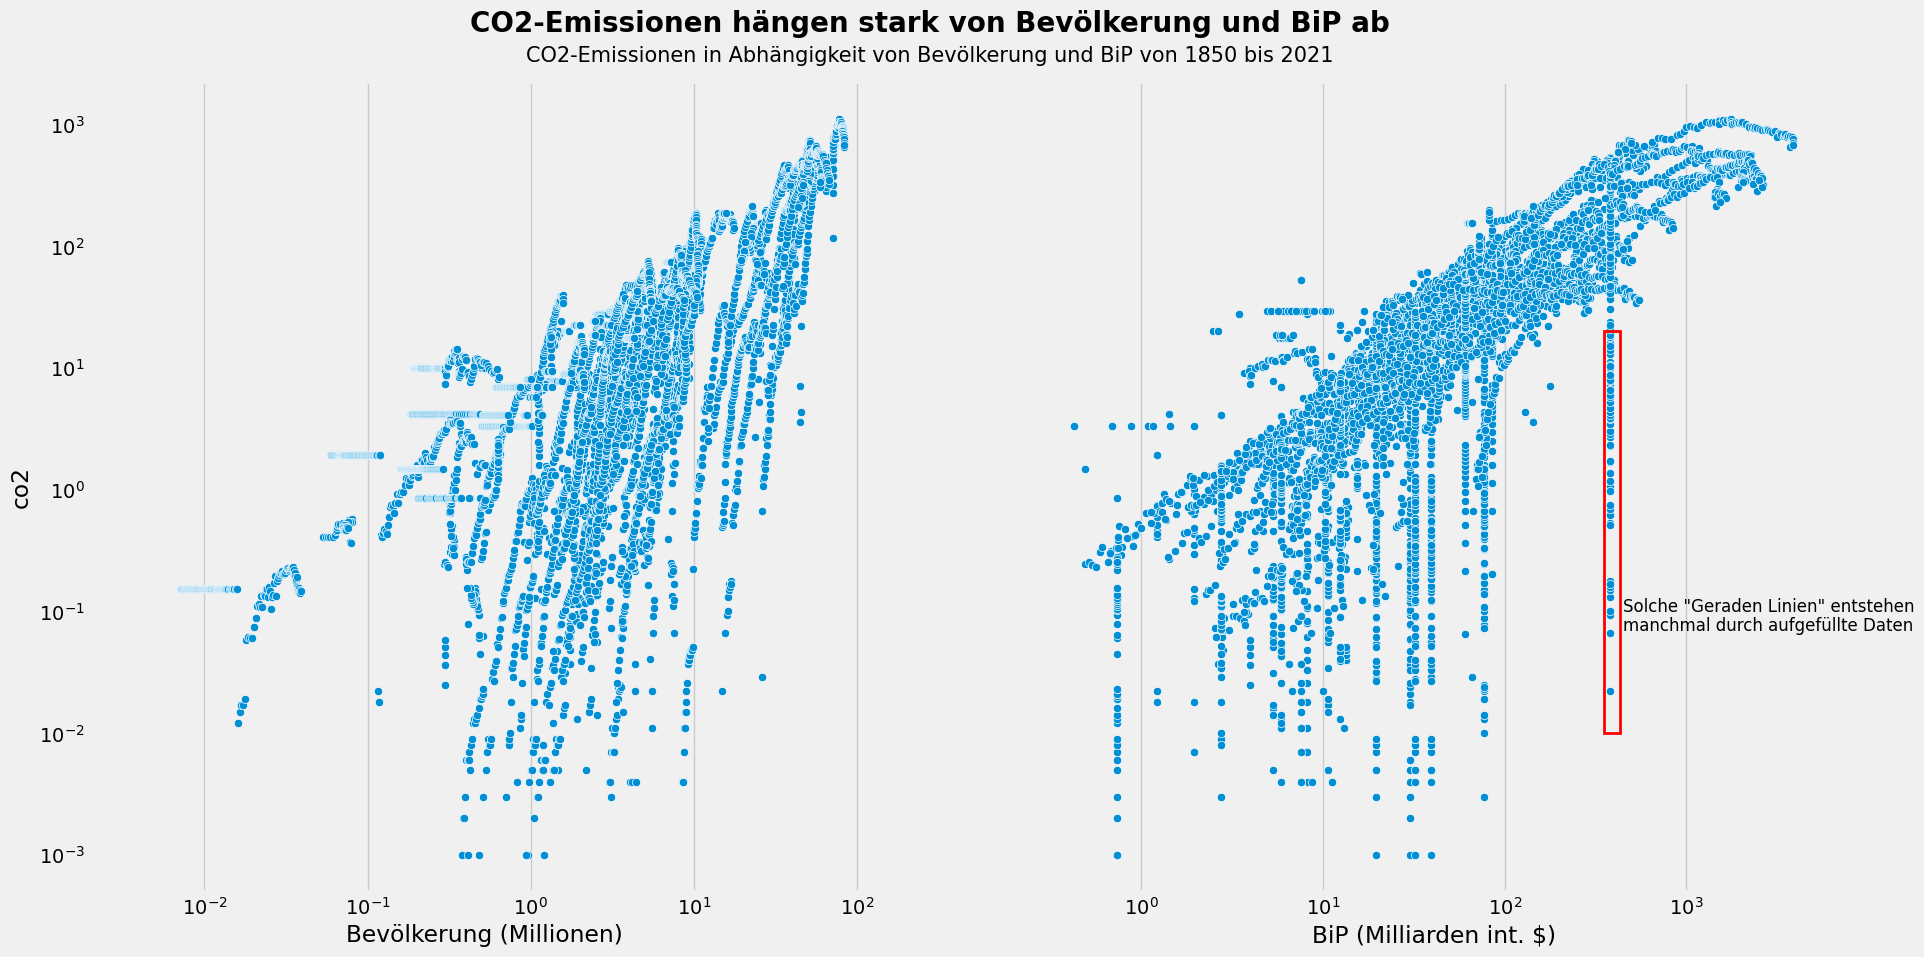

In [172]:
# Vertikale 2er Figure
fig, axs = plt.subplots(1, 2)

fig.set_size_inches(20, 10)

# Plot 1: CO2-Emissionen über population
# CO2-Emissionen über population (in Millionen)
sns.scatterplot(data=co_data, x=co_data['population'] / 1e6, y='co2', ax=axs[0])
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# CO2-Emissionen über GDP (in Milliarden)
sns.scatterplot(data=co_data, x=co_data['gdp'] / 1e9, y='co2', ax=axs[1])
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Y-ticks auf plot 2 entfernen
axs[1].set_yticks([])
axs[1].set_ylabel('')

# X-Beschriftungen 
axs[0].set_xlabel('Bevölkerung (Millionen)')
axs[1].set_xlabel('BiP (Milliarden int. $)')

# Achsenlinien entfernen
axs[0].grid(axis='y')
axs[1].grid(axis='y')

# Rote box
fig.text(0.5, 0.93, 'CO2-Emissionen hängen stark von Bevölkerung und BiP ab', fontsize=20, weight='bold', ha='center')
fig.text(0.5, 0.9, 'CO2-Emissionen in Abhängigkeit von Bevölkerung und BiP von 1850 bis 2021', fontsize=15, ha='center')

# Rote box um einige Wertepaare
axs[1].add_patch(plt.Rectangle((350, 0.01), 80, 20, fill=False, edgecolor='red', lw=2))

# Text neben der Roten box
axs[1].text(450, 0.1, 'Solche "Geraden Linien" entstehen', fontsize=12)
axs[1].text(450, 0.07, 'manchmal durch aufgefüllte Daten', fontsize=12)



